# **Importing Libraries**

**Basic Libraries**

In [2]:
import pandas as pd
import numpy as np

**Libraries for visualisation and analysis**

In [3]:
#libraries used for statistical graphics in python
import seaborn as sb
import matplotlib.pyplot as plt

**Data Preprocessing Libraries**

In [4]:
#Libraries used for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# **Importing Models**

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, SGDRegressor,MultiTaskLasso,MultiTaskElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,HistGradientBoostingRegressor


#for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Data Analysis**

**Reading the Data**

In [6]:
Alloy_data_path = r"https://raw.githubusercontent.com/DarshanGoodGuy/IITISOC25/refs/heads/main/final_dataset1.csv"
Alloy_data = pd.read_csv(Alloy_data_path)

**Analysing the Data**

In [7]:
Alloy_data.head()

,FORMULA,Co,Cr,Fe,Ni,Mn,Nb,Ti,Al,C,...,Ca,Y,Pd,Sc,PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Calculated Young modulus (GPa)
0,Co1 Cr1 Fe1 Ni1,26.138193,23.061468,24.768591,26.031747,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.2,25.0,274.0,708.0,39.0,226.0
1,Co1 Cr1 Mn1 Ni1,26.243766,23.154613,NaN,26.136890,24.464731,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.1,25.0,282.0,694.0,44.0,222.0
2,Co1 Cr1 Ni1,34.743724,30.654043,NaN,34.602233,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.3,25.0,300.0,860.0,60.0,231.0
3,Co1 Fe1 Mn1 Ni1,25.801523,NaN,24.449562,25.696448,24.052467,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.2,25.0,170.0,550.0,41.0,204.0
4,Co1 Fe1 Ni1,33.972825,NaN,32.192701,33.834474,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.5,25.0,211.0,513.0,31.0,207.0


In [8]:
Alloy_data.shape

(947, 33)

In [9]:
Alloy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   FORMULA                                   947 non-null    object 
 1   Co                                        389 non-null    float64
 2   Cr                                        477 non-null    float64
 3   Fe                                        428 non-null    float64
 4   Ni                                        449 non-null    float64
 5   Mn                                        132 non-null    float64
 6   Nb                                        447 non-null    float64
 7   Ti                                        486 non-null    float64
 8   Al                                        344 non-null    float64
 9   C                                         19 non-null     float64
 10  Mo                                    

**Filling the missing values with mean**

In [10]:
Alloy_data.isna().sum()

,0
FORMULA,0
Co,558
Cr,470
Fe,519
Ni,498
Mn,815
Nb,500
Ti,461
Al,603
C,928


In [11]:
Alloy_data.iloc[:, -4:] = Alloy_data.iloc[:, -4:].fillna(Alloy_data.iloc[:, -4:].mean())
Alloy_data.head()

,FORMULA,Co,Cr,Fe,Ni,Mn,Nb,Ti,Al,C,...,Ca,Y,Pd,Sc,PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Calculated Young modulus (GPa)
0,Co1 Cr1 Fe1 Ni1,26.138193,23.061468,24.768591,26.031747,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.2,25.0,274.0,708.0,39.0,226.0
1,Co1 Cr1 Mn1 Ni1,26.243766,23.154613,NaN,26.136890,24.464731,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.1,25.0,282.0,694.0,44.0,222.0
2,Co1 Cr1 Ni1,34.743724,30.654043,NaN,34.602233,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.3,25.0,300.0,860.0,60.0,231.0
3,Co1 Fe1 Mn1 Ni1,25.801523,NaN,24.449562,25.696448,24.052467,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.2,25.0,170.0,550.0,41.0,204.0
4,Co1 Fe1 Ni1,33.972825,NaN,32.192701,33.834474,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.5,25.0,211.0,513.0,31.0,207.0


In [12]:
Alloy_data.isna().sum()

,0
FORMULA,0
Co,558
Cr,470
Fe,519
Ni,498
Mn,815
Nb,500
Ti,461
Al,603
C,928


# **Data Standardisation**

In [13]:
Alloy_data.shape

(947, 33)

In [14]:
#Assigning Feature and Target variables
X = Alloy_data.iloc[:,1:27] #Feature Columns
y = Alloy_data.iloc[:,27:38]  #Target Columns

In [15]:
X.head()

,Co,Cr,Fe,Ni,Mn,Nb,Ti,Al,C,Mo,...,Zn,Ta,Zr,Hf,W,Re,Ca,Y,Pd,Sc
0,26.138193,23.061468,24.768591,26.031747,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26.243766,23.154613,NaN,26.136890,24.464731,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34.743724,30.654043,NaN,34.602233,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.801523,NaN,24.449562,25.696448,24.052467,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33.972825,NaN,32.192701,33.834474,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
y.head()

,PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Calculated Young modulus (GPa)
0,8.2,25.0,274.0,708.0,39.0,226.0
1,8.1,25.0,282.0,694.0,44.0,222.0
2,8.3,25.0,300.0,860.0,60.0,231.0
3,8.2,25.0,170.0,550.0,41.0,204.0
4,8.5,25.0,211.0,513.0,31.0,207.0


**Scaling of data**

In [17]:
sc = MinMaxScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X),columns=X.columns);
columns_to_scale = ['PROPERTY: Calculated Density (g/cm$^3$)', 'PROPERTY: Test temperature ($^\circ$C)', 'PROPERTY: YS (MPa)', 'PROPERTY: UTS (MPa)','PROPERTY: Elongation (%)','PROPERTY: Calculated Young modulus (GPa)']
X_scaled = X_scaled.fillna(0)
y_scaled = y.copy()
y_scaled[columns_to_scale] = sc.fit_transform(y[columns_to_scale])

In [18]:
X_scaled.head()

,Co,Cr,Fe,Ni,Mn,Nb,Ti,Al,C,Mo,...,Zn,Ta,Zr,Hf,W,Re,Ca,Y,Pd,Sc
0,0.392247,0.530344,0.432264,0.452454,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.394086,0.532722,0.000000,0.454576,0.583150,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.542211,0.724192,0.000000,0.625437,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.386380,0.000000,0.425798,0.445687,0.571841,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.528777,0.000000,0.582723,0.609941,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
y_scaled.head()

,PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Calculated Young modulus (GPa)
0,0.552846,0.157213,0.086124,0.159245,0.371429,0.681416
1,0.544715,0.157213,0.089069,0.155695,0.419048,0.663717
2,0.560976,0.157213,0.095694,0.197789,0.571429,0.703540
3,0.552846,0.157213,0.047847,0.119180,0.390476,0.584071
4,0.577236,0.157213,0.062937,0.109798,0.295238,0.597345


In [20]:
y_scaled.columns

Index(['PROPERTY: Calculated Density (g/cm$^3$)',
       'PROPERTY: Test temperature ($^\circ$C)', 'PROPERTY: YS (MPa)',
       'PROPERTY: UTS (MPa)', 'PROPERTY: Elongation (%)',
       'PROPERTY: Calculated Young modulus (GPa)'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split

X_new,X_test,y_new,y_test = train_test_split(X_scaled,y_scaled,test_size=0.1,random_state=1);
X_train,X_valid,y_train,y_valid = train_test_split(X_new,y_new,test_size=0.2,random_state=1)

[X_train.shape,y_train.shape],[X_valid.shape,y_valid.shape],[X_test.shape,y_test.shape]

([(681, 26), (681, 6)], [(171, 26), (171, 6)], [(95, 26), (95, 6)])

In [22]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (681, 26) (681, 6)
Validation set shape: (171, 26) (171, 6)
Test set shape: (95, 26) (95, 6)


# **Modelling**

**Using various regression models to find the best one**

In [23]:
import xgboost as xgb

def model_results(XTrain,XValid,yTrain,yValid):
  models =[('Random Forest',RandomForestRegressor()),
           ('MLP',MLPRegressor(max_iter = 1000)),
           ('RidgeCV',MultiOutputRegressor(RidgeCV())),
           ('SGD',MultiOutputRegressor(SGDRegressor())),
           ('KNN', KNeighborsRegressor(n_neighbors=10)),
           ('Support Vector',MultiOutputRegressor(SVR())),
           ('Decision Tree',MultiOutputRegressor(DecisionTreeRegressor())),
           ('AdaBoost',MultiOutputRegressor(AdaBoostRegressor())),
           ('X_gb',MultiOutputRegressor(xgb.XGBRegressor())),
           ('GradientBoost',MultiOutputRegressor(GradientBoostingRegressor())),
          ]
  finalResults = []

  for name,model in models:
      model.fit(XTrain, yTrain)
      model_results = model.predict(XValid)
      r2score = r2_score(yValid, model_results)
      RMSE = np.sqrt(mean_squared_error(yValid, model_results))
      MAE = mean_absolute_error(yValid, model_results)
      finalResults.append((name, r2score, RMSE, MAE))

  finalResults.sort(key=lambda k:k[2])
  return finalResults



In [24]:
np.random.seed(42)
np_results = model_results(X_train,X_valid,y_train,y_valid)
results = pd.DataFrame(np_results,columns=['Model Name', 'R2 Score', 'RMSE', 'MAE'])
results

,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.485273,0.121450,0.076184
1,Random Forest,0.488808,0.122150,0.069909
2,X_gb,0.436836,0.127753,0.069063
3,Support Vector,0.428207,0.127862,0.094852
4,KNN,0.377956,0.134287,0.090114
5,Decision Tree,0.348493,0.137056,0.072546
6,AdaBoost,0.335690,0.137637,0.097812
7,MLP,0.329987,0.138825,0.101103
8,RidgeCV,0.325966,0.140780,0.099010
9,SGD,0.220684,0.149583,0.110423


In [29]:
names = []
r2score = []
rmse = []
mae = []
for model in np_results:
  names.append(model[0])
  r2score.append(model[1])
  rmse.append(model[2])
  mae.append(model[3])

r2 score comparison

Text(0.5, 1.0, 'r2score comparison')

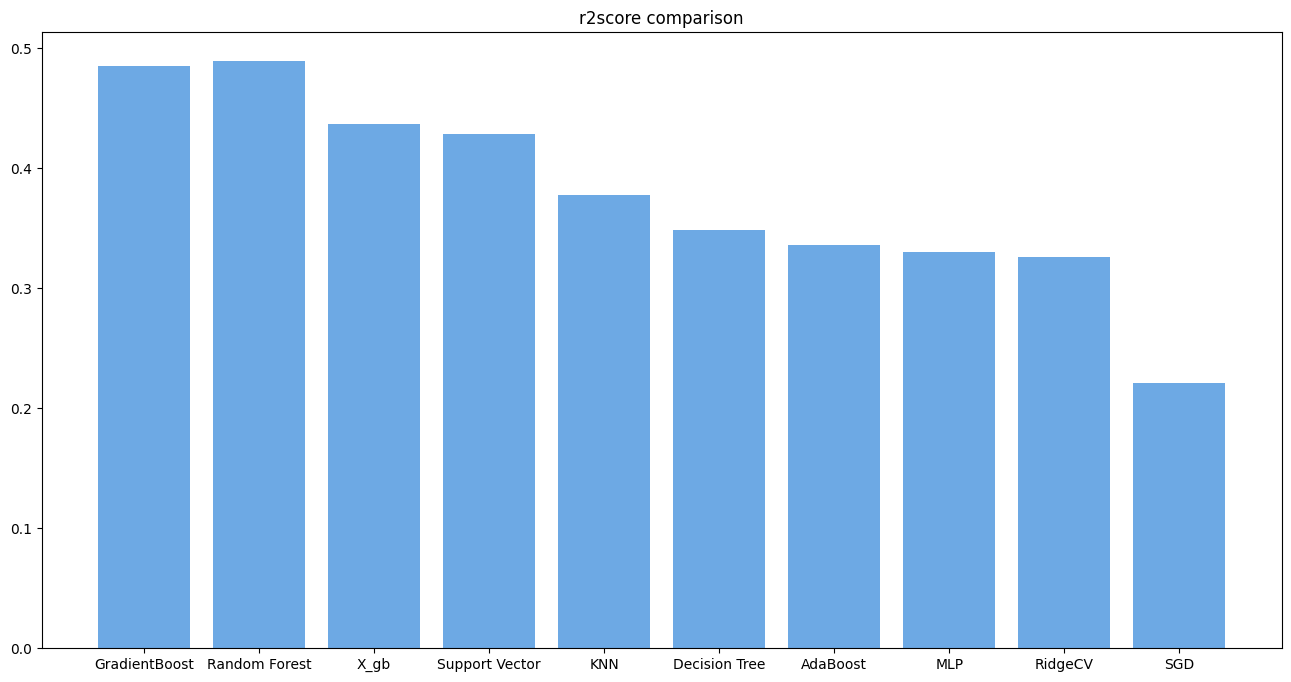

In [30]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,r2score,width=0.8,color='#6DA9E4')
plt.title('r2score comparison')

rmse comparison

Text(0.5, 1.0, 'rmse comparison')

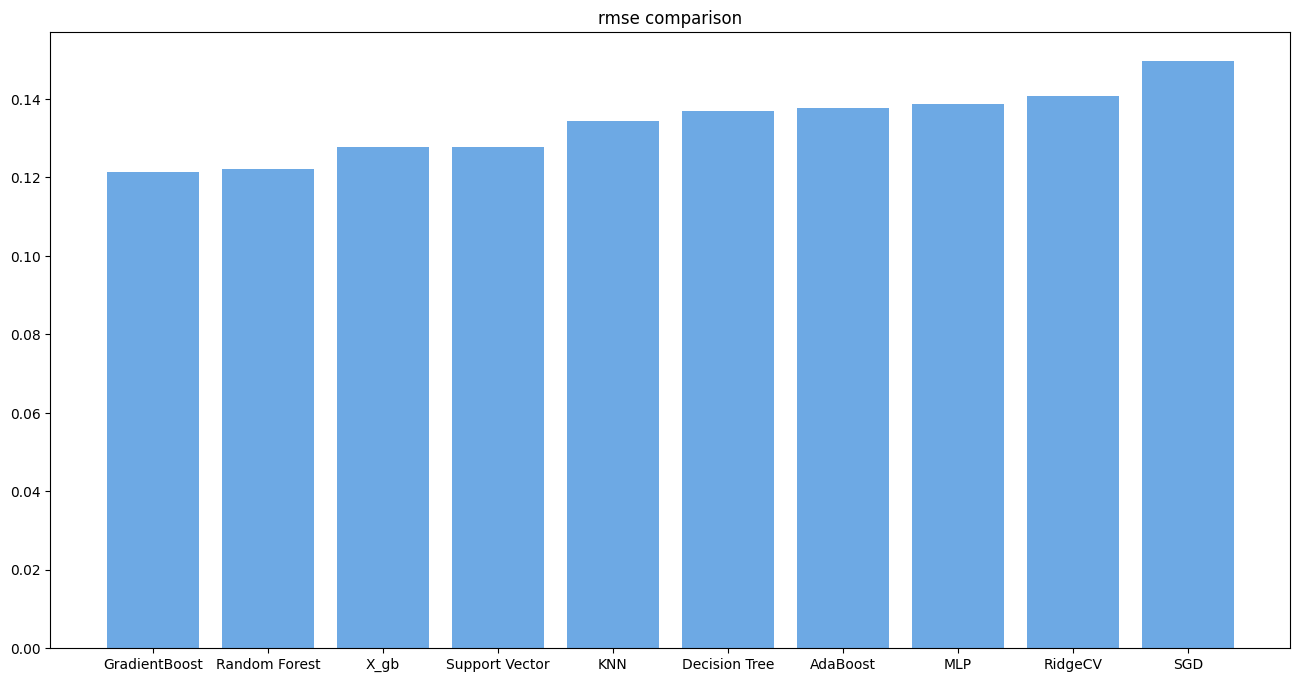

In [31]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,rmse,width=0.8,color='#6DA9E4')
plt.title('rmse comparison')

mae comparison

Text(0.5, 1.0, 'mae comparison')

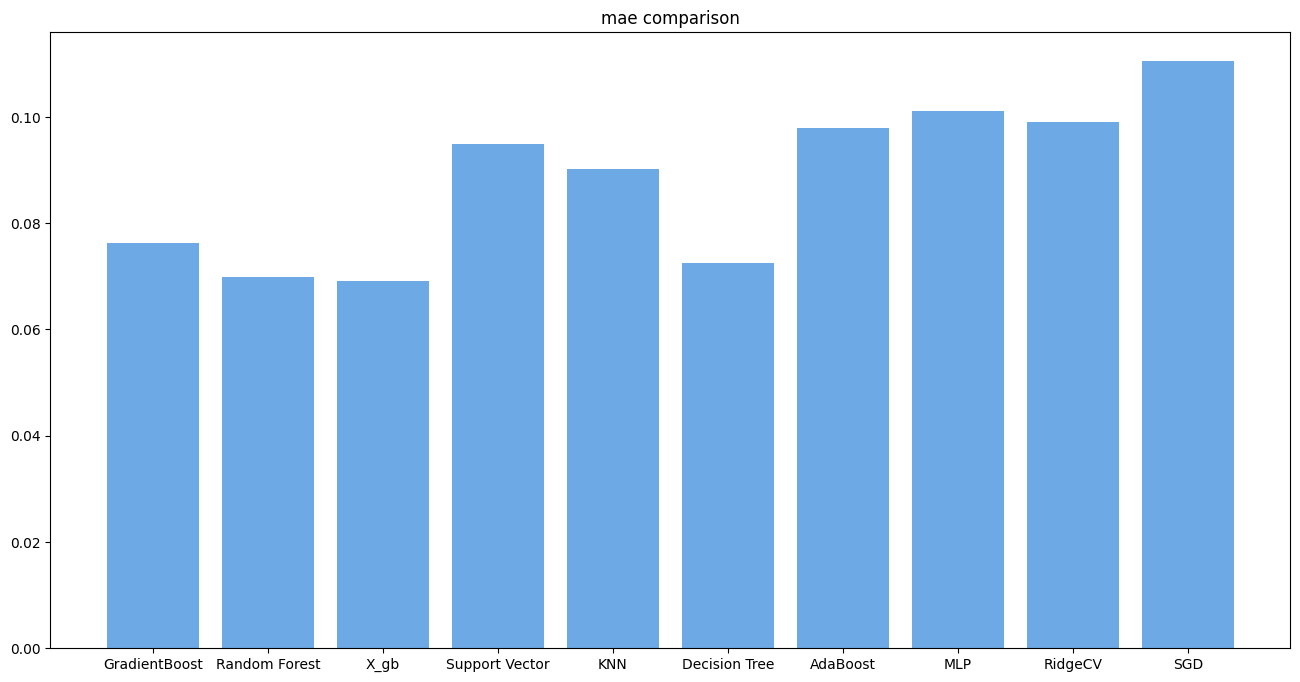

In [32]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,mae,width=0.8,color='#6DA9E4')
plt.title('mae comparison')

In [28]:
Final_model = results.iloc[1:2, :]
Final_model

,Model Name,R2 Score,RMSE,MAE
1,Random Forest,0.488808,0.12215,0.069909
